<p style="text-align:center;"><span style="font-size:80px;"><span style="color:black"><span style="font-family:cursive;"><span style="font-weight:1000">Hi Everybody 👋🏻</span></span></span></span></p>

<div style="border-radius:10px; padding: 15px; background-color: #edf2f4; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:900; text-align: center; font-size:160%"><font color=#bc4749>Bank Loan Offer</font></span></h4>


<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><code>ID</code></td>
    <td>Customer ID</td>
  </tr>
  <tr>
    <td><code>Age</code></td>
    <td>Customer's age</td>
  </tr>
  <tr>
    <td><code>Experience</code></td>
    <td>Years of customer experience</td>
  </tr>
  <tr>
    <td><code>Income</code></td>
    <td>Customer's annual income</td>
  </tr>
  <tr>
    <td><code>ZIP Code</code></td>
    <td>Customer's home address zipcode</td>
  </tr>
  <tr>
    <td><code>Family</code></td>
    <td>Customer's family members count</td>
  </tr>
  <tr>
    <td><code>CCAvg</code></td>
    <td>Avg. spending on credit cards per month</td>
  </tr>
  <tr>
    <td><code>Education</code></td>
    <td>Education level<br><br>undergraduate: 1<br>graduated: 2<br>Advanced education: 3</td>
  </tr>
  <tr>
    <td><code>Mortgage</code></td>
    <td>Value of house mortgage</td>
  </tr>
  <tr>
    <td><code><b>Personal Loan (target variable)</b></code></td>
    <td>Did the customers accept the offer in the last campaign?</td>
  </tr>
  <tr>
    <td><code>Securities Account</code></td>
    <td>Does the customer have a securities account with the bank?</td>
  </tr>
  <tr>
    <td><code>CD Account</code></td>
    <td>Does the customer have a certificate of deposit (CD) account with the bank?</td>
  </tr>
  <tr>
    <td><code>Online</code></td>
    <td>Does the customer use internet banking facilities?</td>
  </tr>
  <tr>
    <td><code>CreditCard</code></td>
    <td>Does the customer use a credit card issued by UniversalBank?</td>
  </tr>
</table>

<h4 align="left"><span style="font-weight:600; font-size:110%"><font color=#bc4749>About project:</font></span></h4>
Nowadays, the identification of customers and how to approach them is of utmost importance. Companies strive to determine the likelihood of customers accepting an offer before making it, enabling them to provide the most suitable offer to their customers.

In this dataset, we have numerous bank customers, each with their own set of characteristics. Ultimately, we aim to determine whether these customers have accepted previous loan offers from the bank or not. By developing an accurate model, we can predict whether another individual, to whom we are considering making a proposal, will accept or decline our offer.

<a id="setup"></a>
<h1><p style="padding:15px;background-color:#edf2f4 ;margin:0;color:#191919;font-family:Arial;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #bc4749">Table Of Content</p></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; color:#bc4749">Table of Contents</span></h2>

 *  **[Step 1 | Nessesary Libraries](#s1)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#lib_config)
 *  **[Step 2 | Dataset](#s2)**
    -  [2.1 | Load dataset](#load_data)
    -  [2.2 | About dataset](#about)
 *  **[Step 3 | Preprocessing](#s3)**
    -  [3.1 | Check "CCAvg"](#ccavg)
    -  [3.2 | Check "Experience"](#ex)
    -  [3.3 | Missing values](#miss)
    -  [3.4 | Duplicated values](#dup)
    -  [3.5 | Noise](#noise)
    -  [3.6 | Plots](#plots)
 *  **[Step 4 | Modeling](#s4)**
    -  [4.1 | Features selection](#fea)
    -  [4.2 | Logestic Regression](#logreg)
    -  [4.3 | KNN](#knn)
    -  [4.4 | Complement Naive Bayes (CNB)](#cnb)
    -  [4.5 | Decision Tree classifier](#dtc)
    -  [4.6 | Random Forest classifier](#rf)
    -  [4.7 | Result](#re)

 *  **[Author](#author)**

<a id="s1"></a>
<h1><p style="padding:15px;background-color:#edf2f4 ;margin:0;color:#191919;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #bc4749">Step 1 | Nessasary Libraries</p></h1>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍If you don't have libraries, then you should install them. (ex. pip install pandas)
</span></h5>

<a id="import"></a>
<h2><b><span style="color:#191919">Step 1.1 | </span><span style="color:#bc4749">Import Libraries</span></b></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import zipcodes as zcode
import folium

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

<a id="lib_config"></a>
<h2><b><span style="color:#191919">Step 1.1 | </span><span style="color:#bc4749">Library configurations</span></b></h2>

In [2]:
plt.style.use('bmh')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<a id="s2"></a>
<h1><p style="padding:15px;background-color:#edf2f4 ;margin:0;color:#191919;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #bc4749">Step 2 | Dataset</p></h1>

<a id="load_data"></a>
<h2><b><span style="color:#191919">Step 2.1 | </span><span style="color:#bc4749">Load dataset</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍Here, we import data from a csv file, using pandas library.
</span></h5>

In [5]:
data = pd.read_csv ("Bank_Personal_Loan.csv")
df = pd.DataFrame(data)
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍All the column names in the DataFrame will have any spaces replaced with underscores.
</span></h5>

In [6]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df

ID  Age  Experience  Income  ZIP_Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

<a id="about"></a>
<h2><b><span style="color:#191919">Step 2.2 | </span><span style="color:#bc4749">About dataset</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    📍<code>.shape</code> returns the row and column count of the DataFrame in a simple tuple format.</br></br>
    📍<code>.head</code> returns a subset of rows from the top of the DataFrame, allowing convenient previewing of the start of the data.</br></br>
    📍<code>.info</code>provides a succinct summary of a DataFrame. It gives concise information about column names, data types, non-missing values and memory usage.</br></br>
    📍<code>.describe(include='all')</code> provides a high-level summary of numeric and object columns in a DataFrame.
</span></h5>

In [7]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 5000 rows and 14 columns.


In [8]:
df.head()

ID  Age  Experience  Income  ZIP_Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP_Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal_Loan       5000 non-null   int64 
 10  Securities_Account  5000 non-null   int64 
 11  CD_Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ⚠️ Pay attention to the value and dtype of the "CCAvg" column.
</span></h5>

In [10]:
df.describe(include='all')

ID          Age   Experience       Income      ZIP_Code  \
count   5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.500000    45.338400    20.104600    73.774200  93152.503000   
std     1443.520003    11.463166    11.467954    46.033729   2121.852197   
min        1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%     1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%     2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%     3750.250000    55.000000    30.000000    98.000000  94608.000000   
max     5000.000000    67.000000    43.000000   224.000000  96651.000000   

             Family CCAvg    Education     Mortgage  Personal_Loan  \
count   5000.000000  5000  5000.000000  5000.000000    5000.000000   
unique          NaN   108          NaN          NaN            NaN   
top             NaN  0/30          NaN          NaN            NaN   
freq            NaN   241          NaN          NaN            NaN   
mean       2.396400   NaN     1.881000    56.498800       0.096000   
std        1.147663   NaN     0.839869   101.713802       0.294621   
min        1.000000   NaN     1.000000     0.000000       0.000000   
25%        1.000000   NaN     1.000000     0.000000       0.000000   
50%        2.000000   NaN     2.000000     0.000000       0.000000   
75%        3.000000   NaN     3.000000   101.000000       0.000000   
max        4.000000   NaN     3.000000   635.000000       1.000000   

        Securities_Account  CD_Account       Online   CreditCard  
count          5000.000000  5000.00000  5000.000000  5000.000000  
unique                 NaN         NaN          NaN          NaN  
top                    NaN         NaN          NaN          NaN  
freq                   NaN         NaN          NaN          NaN  
mean              0.104400     0.06040     0.596800     0.294000  
std               0.305809     0.23825     0.490589     0.455637  
min               0.000000     0.00000     0.000000     0.000000  
25%               0.000000     0.00000     0.000000     0.000000  
50%               0.000000     0.00000     1.000000     0.000000  
75%               0.000000     0.00000     1.000000     1.000000  
max               1.000000     1.00000     1.000000     1.000000

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ⚠️ min value of column "Experience" isn't reasonable.
</span></h5>

<a id="s3"></a>
<h1><p style="padding:15px;background-color:#edf2f4 ;margin:0;color:#191919;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #bc4749">Step 3 | Preprocessing</p></h1>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍 Drop "ID" column.
</span></h5>

In [11]:
df.drop(["ID"], axis=1, inplace=True)

<a id="ccavg"></a>
<h2><b><span style="color:#191919">Step 3.1 | </span><span style="color:#bc4749">Check "CCAvg"</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍 In order to be able to change the data type of the "CCAvg" column to float, we must correct the value of the column. ( Change "/" to "." )
</span></h5>

In [12]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')
df

Age  Experience  Income  ZIP_Code  Family CCAvg  Education  Mortgage  \
0      25           1      49     91107       4  1.60          1         0   
1      45          19      34     90089       3  1.50          1         0   
2      39          15      11     94720       1  1.00          1         0   
3      35           9     100     94112       1  2.70          2         0   
4      35           8      45     91330       4  1.00          2         0   
...   ...         ...     ...       ...     ...   ...        ...       ...   
4995   29           3      40     92697       1  1.90          3         0   
4996   30           4      15     92037       4  0.40          1        85   
4997   63          39      24     93023       2  0.30          3         0   
4998   65          40      49     90034       3  0.50          2         0   
4999   28           4      83     92612       3  0.80          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [13]:
df['CCAvg'] = df['CCAvg'].astype('float')
df['CCAvg'].dtype

dtype('float64')

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍 Let's convert the unit of measurement for "CCAvg" from per month to per year.
</span></h5>

In [14]:
df['CCAvg'] = df['CCAvg']*12

In [15]:
df["CCAvg"].describe()

count    5000.000000
mean       23.255256
std        20.971908
min         0.000000
25%         8.400000
50%        18.000000
75%        30.000000
max       120.000000
Name: CCAvg, dtype: float64

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ✅ "CCAvg" is OK.
</span></h5>

<a id="ex"></a>
<h2><b><span style="color:#191919">Step 3.2 | </span><span style="color:#bc4749">Check "Experience"</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍 Use <code>abs()</code> to returns the absolute values of "Experience" column.
</span></h5>

In [16]:
df['Experience'] = abs(df['Experience'])

In [17]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ✅ "Experience" is OK.
</span></h5>

<a id="miss"></a>
<h2><b><span style="color:#191919">Step 3.3 | </span><span style="color:#bc4749">Missing values</span></b></h2>

In [18]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ✅ There is no Missing values in Dataframe.
</span></h5>

<a id="dup"></a>
<h2><b><span style="color:#191919">Step 3.4 | </span><span style="color:#bc4749">Duplicated values</span></b></h2>

In [19]:
df_duplicated = df.copy()
df_duplicated.drop_duplicates(subset=None, inplace=True)

df_duplicated.shape

(5000, 13)

In [20]:
df.shape

(5000, 13)

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ✅ There is no duplicated values in Dataframe.
</span></h5>

In [21]:
df.describe()

Age   Experience       Income      ZIP_Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200  93152.503000     2.396400   
std      11.463166    11.415189    46.033729   2121.852197     1.147663   
min      23.000000     0.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean     23.255256     1.881000    56.498800       0.096000   
std      20.971908     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       8.400000     1.000000     0.000000       0.000000   
50%      18.000000     2.000000     0.000000       0.000000   
75%      30.000000     3.000000   101.000000       0.000000   
max     120.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

<a id="noise"></a>
<h2><b><span style="color:#191919">Step 3.5 | </span><span style="color:#bc4749">Noise</span></b></h2>

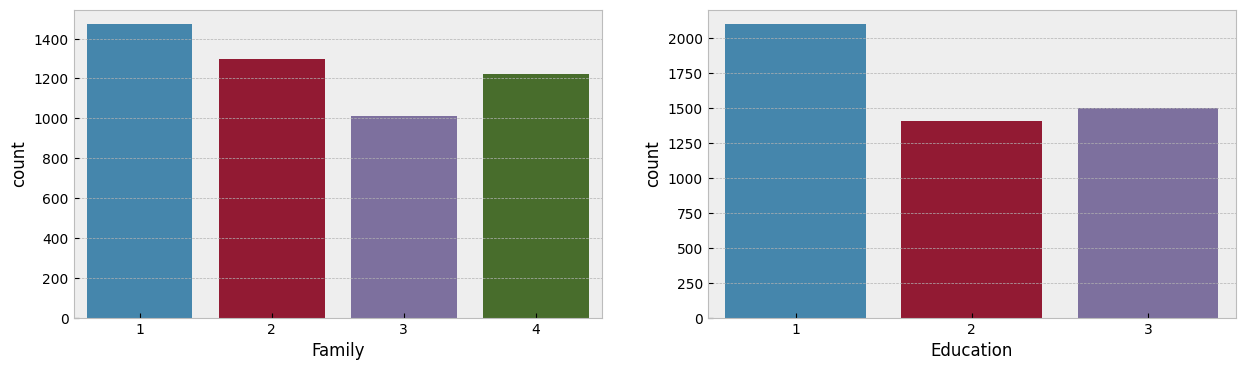

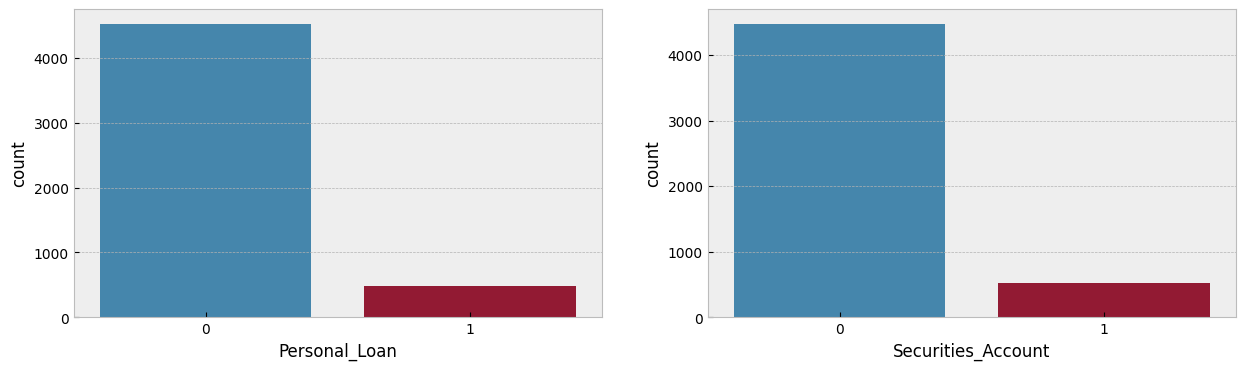

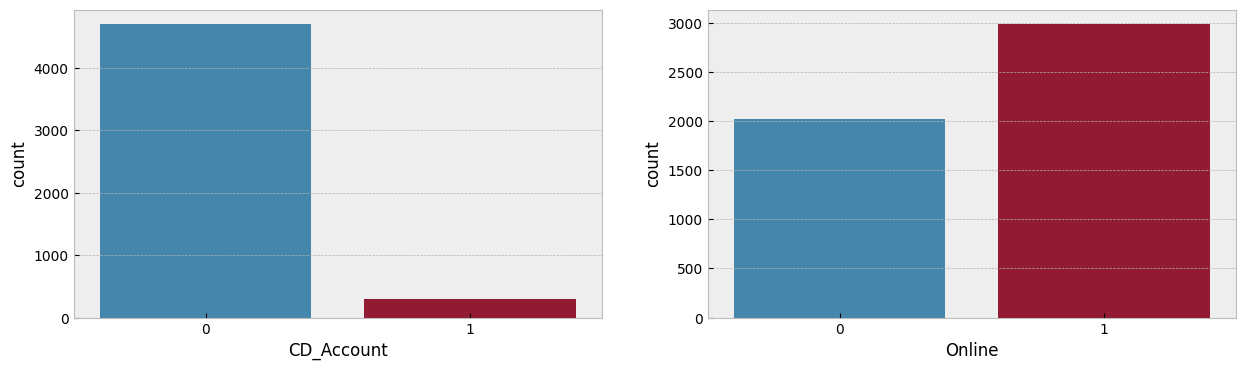

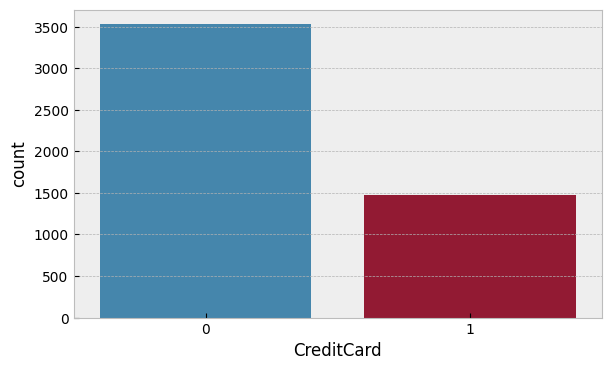

In [22]:
Categorical = ['Family', 'Education', 'Personal_Loan', 'Securities_Account',
               'CD_Account', 'Online', 'CreditCard']
i = 0
while i <= 7 : 
    fig = plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    sns.countplot(x=Categorical[i], data=df)
    i += 1
    if i == 7 :
        break
    plt.subplot(1,2,2)
    sns.countplot(x=Categorical[i], data=df)
    i += 1
    plt.show()

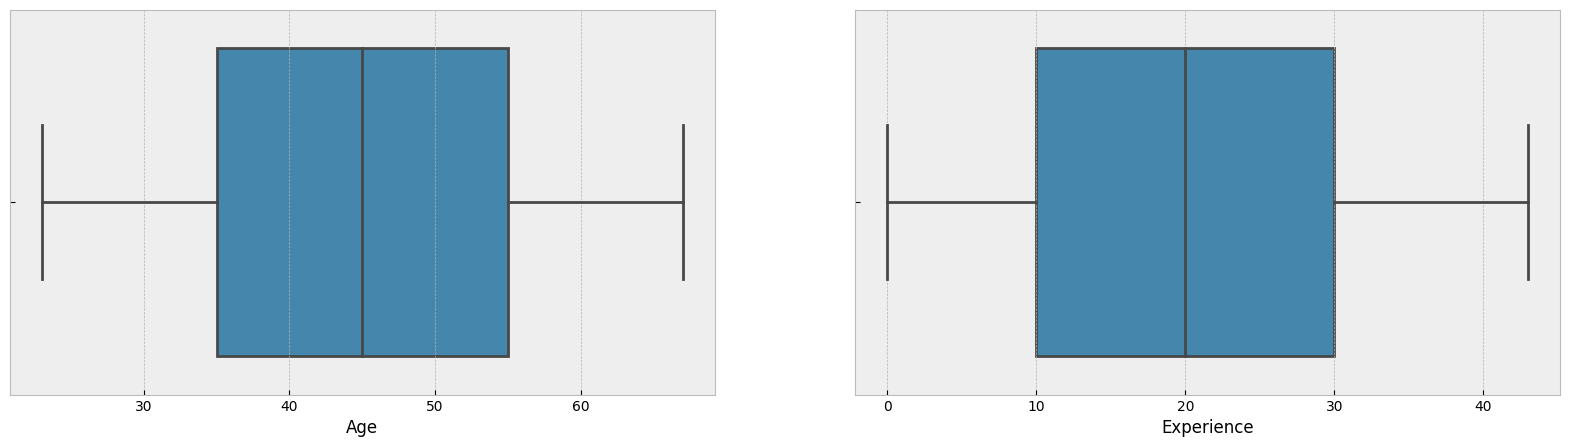

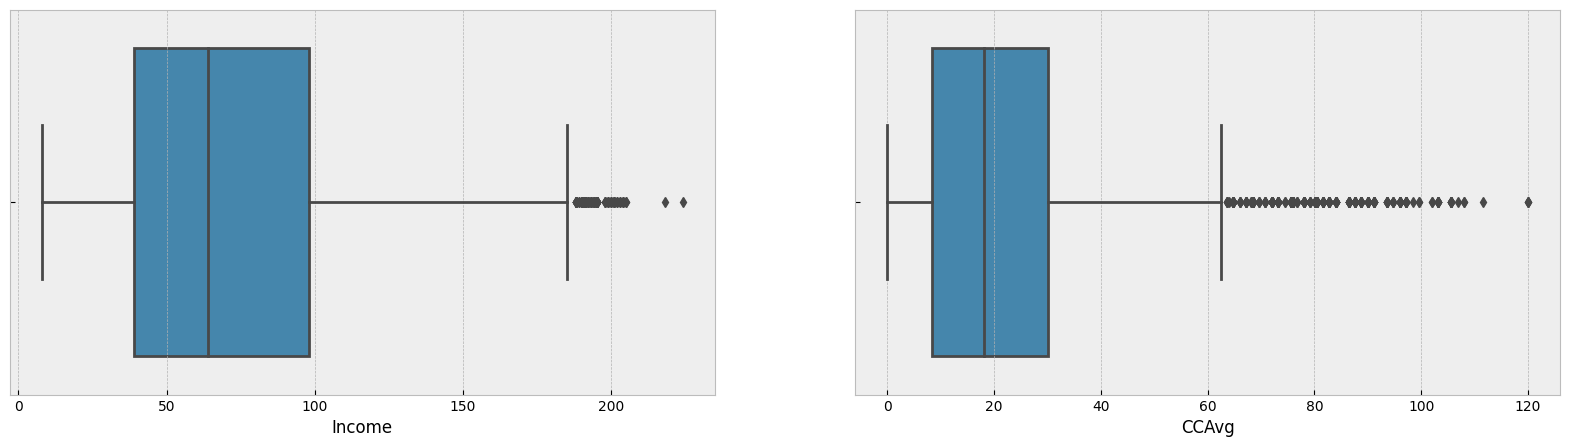

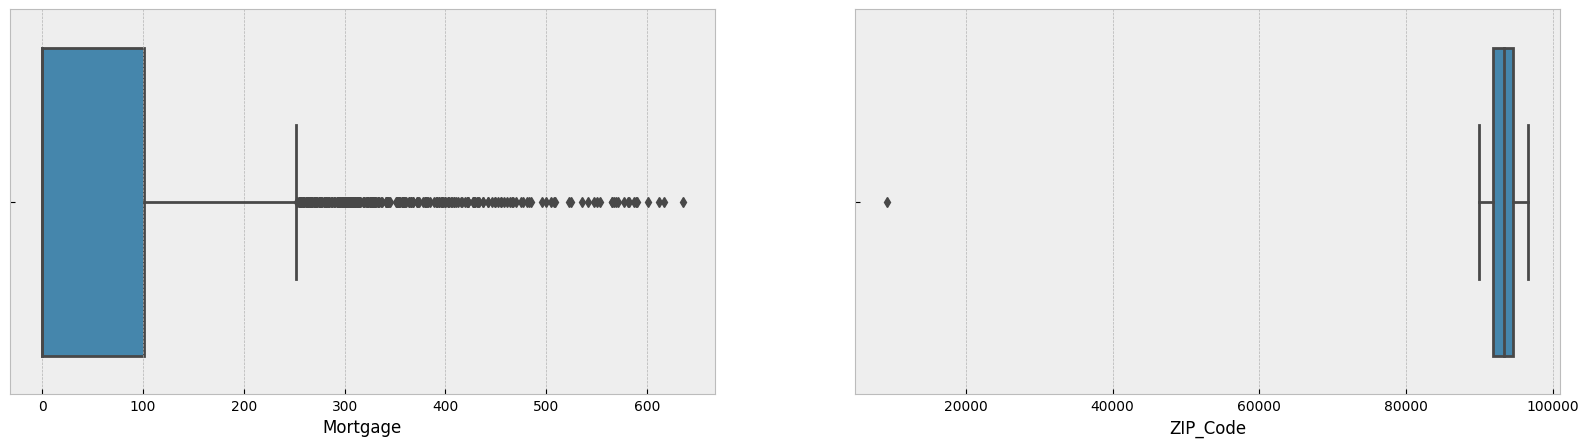

In [23]:
Numerical = [ 'Age', 'Experience', 'Income',  'CCAvg', 'Mortgage', 'ZIP_Code']
i = 0
while i < 6 : 
    fig = plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    sns.boxplot(x= Numerical[i], data=df)
    i += 1
    if i == 6:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x= Numerical[i], data=df)
    i += 1
    plt.show()

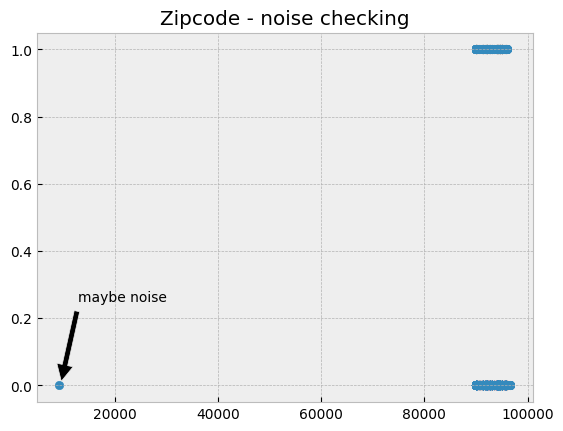

In [24]:
plt.scatter(df['ZIP_Code'], df["Personal_Loan"])
plt.annotate('maybe noise', xy=(9500, 0), xytext=(13000, 0.25),
              arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Zipcode - noise checking")

plt.show()

In [25]:
Noise_zip  = df[df['ZIP_Code'] < 20000]
Noise_zip

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    7.2          3         0   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
384              0                   0           0       1           1

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    🎉 Jackpot we found noise in "ZIP_Code" column.
</span></h5>

In [26]:
df.drop(index=384, inplace=True)

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ✅ There are no noises in "ZIP_Code" column.
</span></h5>

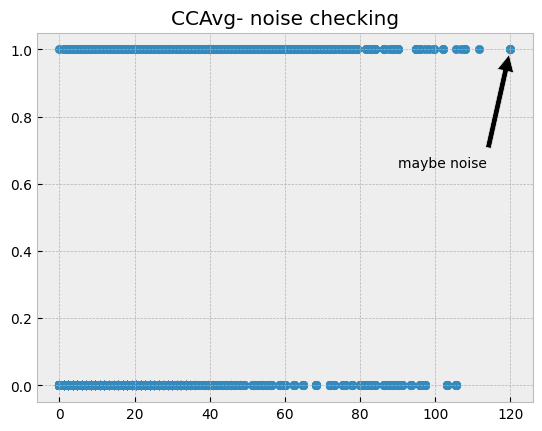

In [27]:
plt.scatter(df['CCAvg'], df["Personal_Loan"])
plt.annotate('maybe noise', xy=(120, 1), xytext=(90, 0.65),
              arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("CCAvg- noise checking")

plt.show()

In [28]:
Noise_ccavg  = df[df['CCAvg'] > 119]
Noise_ccavg

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
787    45          15     202     91380       3  120.0          3         0   
2101   35           5     203     95032       1  120.0          3         0   
2337   43          16     201     95054       1  120.0          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
787               1                   0           0       0           0  
2101              1                   0           0       0           0  
2337              1                   0           0       0           1

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ✅ There are no noises in "CCAvg" column.
</span></h5>

<a id="plots"></a>
<h2><b><span style="color:#191919">Step 3.6 | </span><span style="color:#bc4749">Plots</span></b></h2>

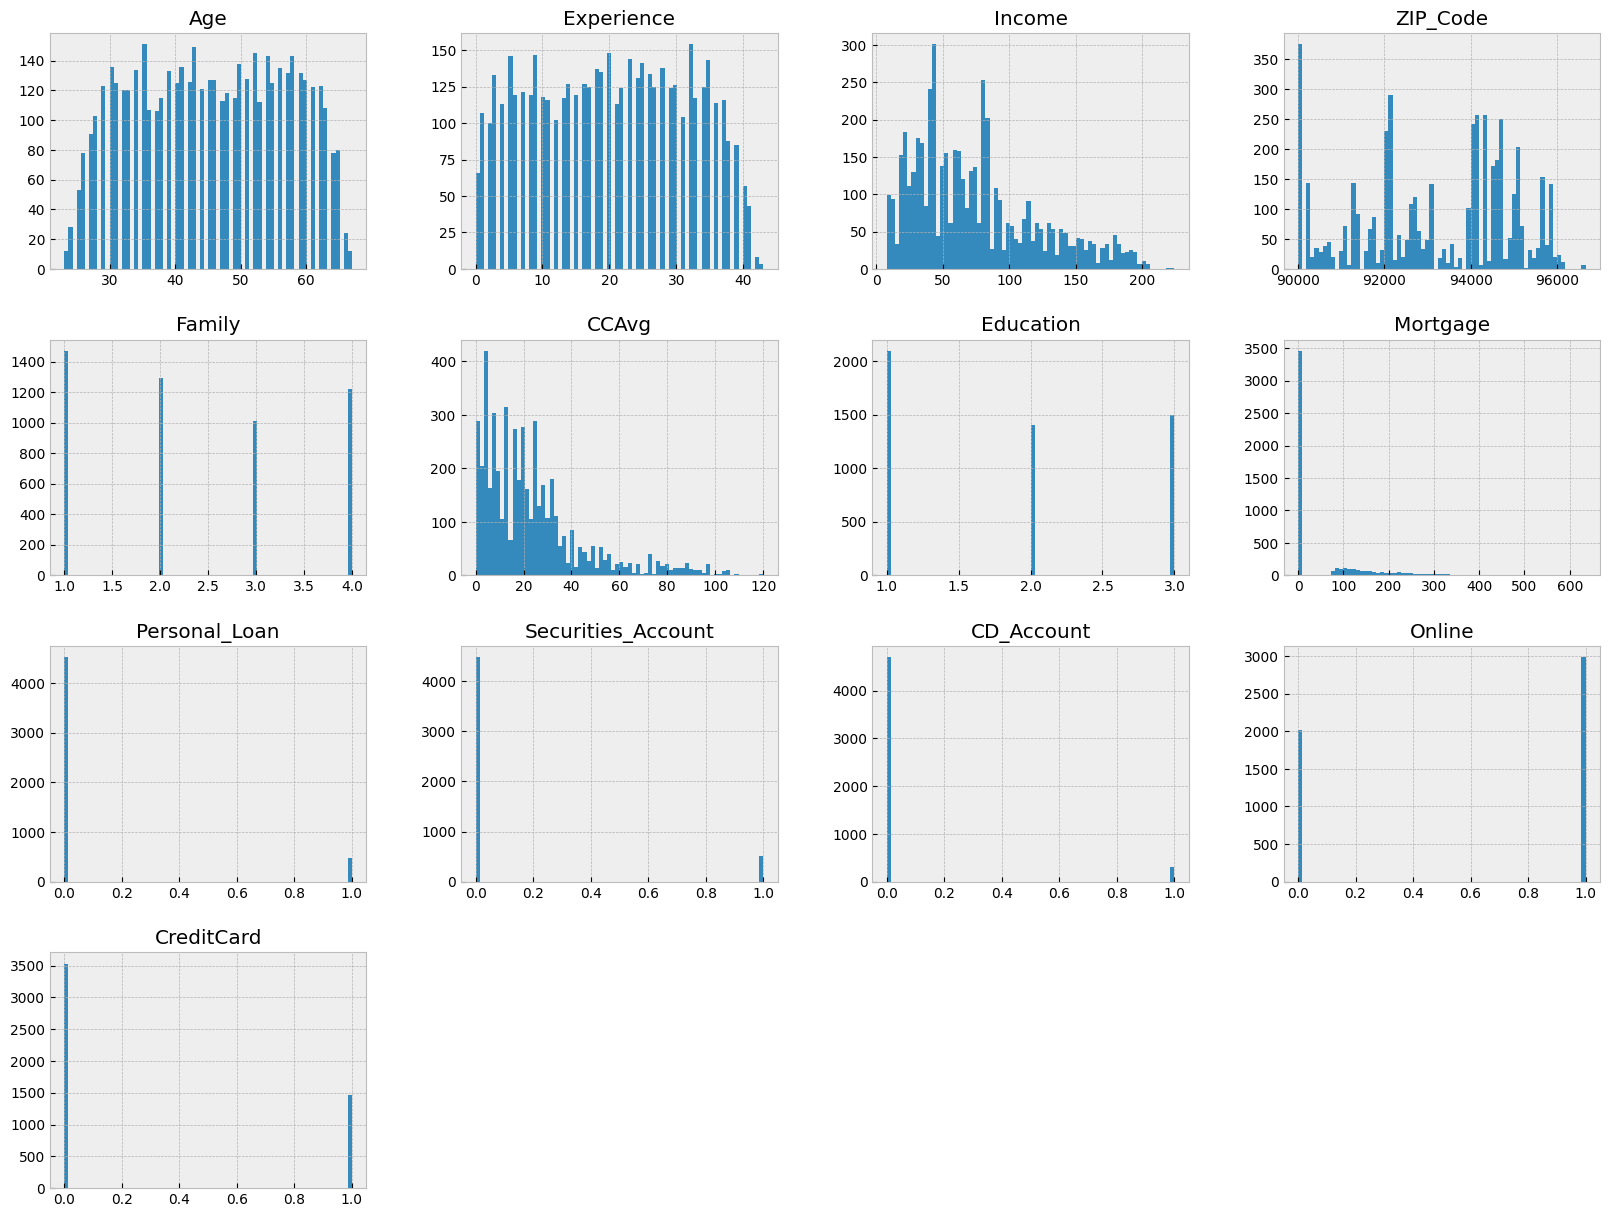

In [29]:
df.hist(bins=70,figsize=(20,15))
plt.show()

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍Focus on Zipcode for better visualization.<br></br>
    📍Extract information from  ZIP code. 
</span></h5>

In [30]:
list_zipcode = list(df['ZIP_Code'])

In [31]:
country = []  # Location
lat = []  # Latitude 
long = [] # Longtitude 

for x in list_zipcode : # check each value of zipcode
    my_city_county = zcode.matching(str(x)) # used zipcode library
    if len(my_city_county) == 1: 
        County= my_city_county[0].get('county')
        Lat = my_city_county[0].get('lat')
        Long = my_city_county[0].get('long')
    else:
        County='Notfound'
        Lat=np.NaN
        Long=np.NaN
    country.insert(0, County)
    lat.insert(0, Lat)
    long.insert(0, Long)
country.reverse()
lat.reverse()
long.reverse()

df['Location'] = country
df['Latitude'] = lat
df['Longtitude'] = long

In [32]:
df

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

                  Location Latitude Longtitude  
0       Los Angeles County  34.1620  -118.0894  
1       Los Angeles County  34.0218  -118.2883  
2           Alameda County  37.8746  -122.2547  
3     San Francisco County  37.7217  -122.4446  
4       Los Angeles County  34.2429  -118.5273  
...                    ...      ...        ...  
4995         Orange County  33.6473  -117.8409  
4996      San Diego County  32.8668  -117.2482  
4997        Ventura County  34.5210  -119.2477  
4998    Los Angeles County  34.0293  -118.3994  
4999         Orange County  33.6615  -117.8217  

[4999 rows x 16 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Experience          4999 non-null   int64  
 2   Income              4999 non-null   int64  
 3   ZIP_Code            4999 non-null   int64  
 4   Family              4999 non-null   int64  
 5   CCAvg               4999 non-null   float64
 6   Education           4999 non-null   int64  
 7   Mortgage            4999 non-null   int64  
 8   Personal_Loan       4999 non-null   int64  
 9   Securities_Account  4999 non-null   int64  
 10  CD_Account          4999 non-null   int64  
 11  Online              4999 non-null   int64  
 12  CreditCard          4999 non-null   int64  
 13  Location            4999 non-null   object 
 14  Latitude            4966 non-null   object 
 15  Longtitude          4966 non-null   object 
dtypes: float64(

In [34]:
df = df.astype({'Latitude':float, 'Longtitude': float})

In [35]:
df.head()

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4   19.2          1         0   
1   45          19      34     90089       3   18.0          1         0   
2   39          15      11     94720       1   12.0          1         0   
3   35           9     100     94112       1   32.4          2         0   
4   35           8      45     91330       4   12.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

               Location  Latitude  Longtitude  
0    Los Angeles County   34.1620   -118.0894  
1    Los Angeles County   34.0218   -118.2883  
2        Alameda County   37.8746   -122.2547  
3  San Francisco County   37.7217   -122.4446  
4    Los Angeles County   34.2429   -118.5273

In [36]:
df.describe(include='all')

Age   Experience       Income      ZIP_Code       Family  \
count   4999.000000  4999.000000  4999.000000   4999.000000  4999.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean      45.337267    20.133627    73.784757  93169.275455     2.396079   
std       11.464033    11.416124    46.032281   1759.630610     1.147554   
min       23.000000     0.000000     8.000000  90005.000000     1.000000   
25%       35.000000    10.000000    39.000000  91911.000000     1.000000   
50%       45.000000    20.000000    64.000000  93437.000000     2.000000   
75%       55.000000    30.000000    98.000000  94608.000000     3.000000   
max       67.000000    43.000000   224.000000  96651.000000     4.000000   

              CCAvg    Education     Mortgage  Personal_Loan  \
count   4999.000000  4999.000000  4999.000000    4999.000000   
unique          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN            NaN   
mean      23.258468     1.880776    56.510102       0.096019   
std       20.972776     0.839804   101.720837       0.294647   
min        0.000000     1.000000     0.000000       0.000000   
25%        8.400000     1.000000     0.000000       0.000000   
50%       18.000000     2.000000     0.000000       0.000000   
75%       30.000000     3.000000   101.000000       0.000000   
max      120.000000     3.000000   635.000000       1.000000   

        Securities_Account   CD_Account       Online   CreditCard  \
count          4999.000000  4999.000000  4999.000000  4999.000000   
unique                 NaN          NaN          NaN          NaN   
top                    NaN          NaN          NaN          NaN   
freq                   NaN          NaN          NaN          NaN   
mean              0.104421     0.060412     0.596719     0.293859   
std               0.305836     0.238273     0.490605     0.455574   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     1.000000     0.000000   
75%               0.000000     0.000000     1.000000     1.000000   
max               1.000000     1.000000     1.000000     1.000000   

                  Location     Latitude   Longtitude  
count                 4999  4966.000000  4966.000000  
unique                  39          NaN          NaN  
top     Los Angeles County          NaN          NaN  
freq                  1095          NaN          NaN  
mean                   NaN    35.792110  -120.037847  
std                    NaN     2.098821     2.092821  
min                    NaN    32.554700  -124.099400  
25%                    NaN    34.003300  -122.148500  
50%                    NaN    35.373600  -120.042400  
75%                    NaN    37.748700  -118.089400  
max                    NaN    41.758900  -115.630500

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ⚠️ We have missing values in "Latitude" and "Longtitude" column.
</span></h5>

In [37]:
df[df['Location'] == 'Notfound']['ZIP_Code'].value_counts()

ZIP_Code
92717    22
96651     6
92634     5
Name: count, dtype: int64

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍 Found information about the ZIP codes mentioned in the output cell above.
</span></h5>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📬 U.S. ZIP Code 92717
</span></h5>

In [38]:
zcode = list(df[df['ZIP_Code']==92717].index)

for x in zcode :
    df.at[x, 'Location']='Irvine'
    df.at[x, 'Latitude'] = 33.6462
    df.at[x, 'Longtitude'] = -117.8398

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📬 U.S. ZIP Code 92634
</span></h5>

In [39]:
zcode = list(df[df['ZIP_Code']==92634].index)

for x in zcode :
    df.at[x, 'Location']='Fullerton'
    df.at[x, 'Latitude'] = 33.8739
    df.at[x, 'Longtitude'] = -117.9028

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ⚠️ U.A.E. ZIP Code 96651<br></br>
    📍 Drop this ZIP Code
</span></h5>

In [40]:
z = list(df[df['ZIP_Code']==96651].index)

for x in z :
    df.drop(index=x, inplace=True)

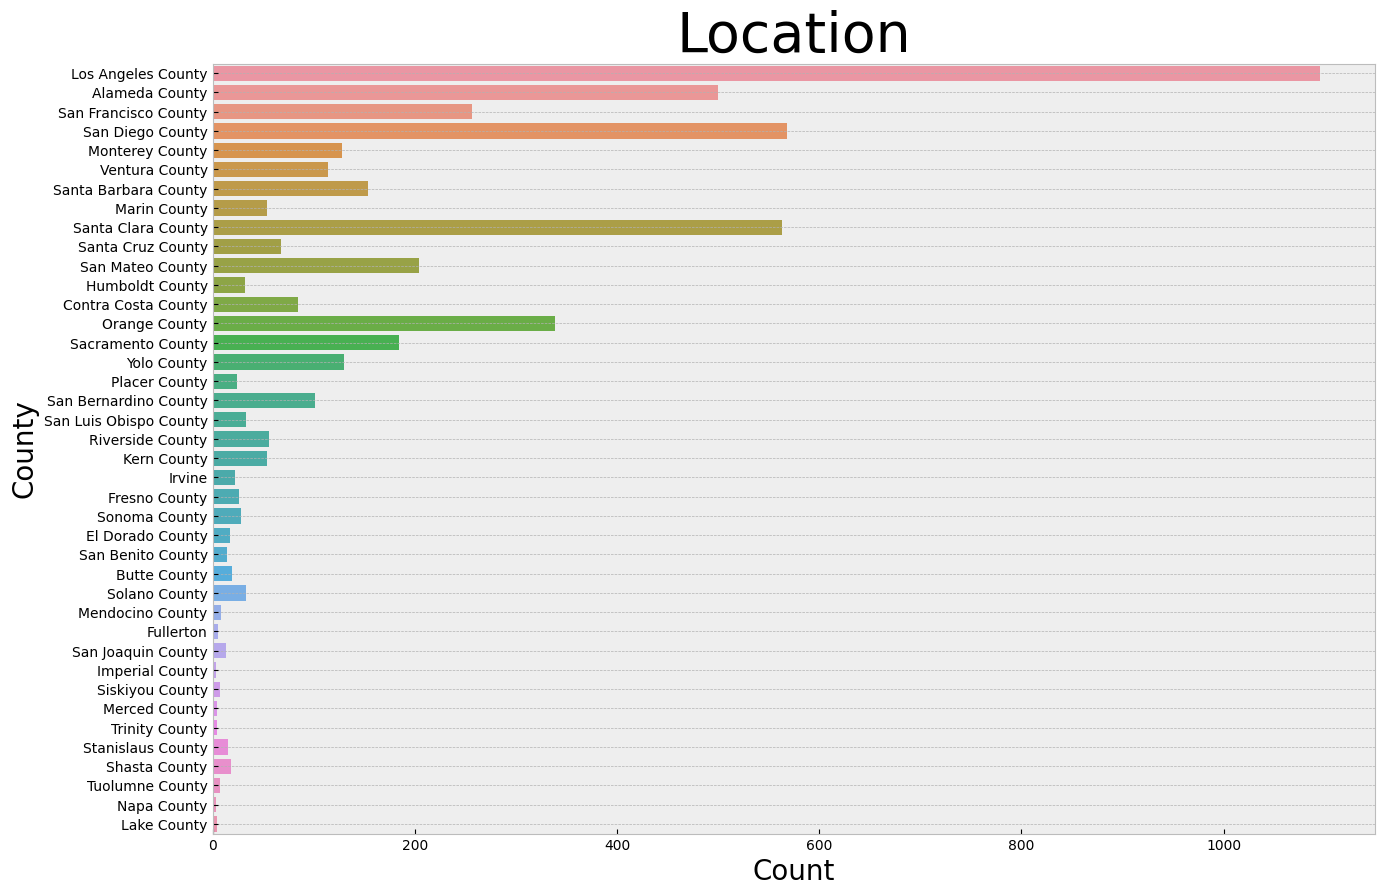

In [41]:
plt.figure(figsize=(15, 10)) 
sns.countplot(y='Location', data=df)
plt.title('Location', fontsize=40)
plt.grid()
plt.xlabel('Count', fontsize=20)
plt.ylabel('County', fontsize=20)
plt.show()

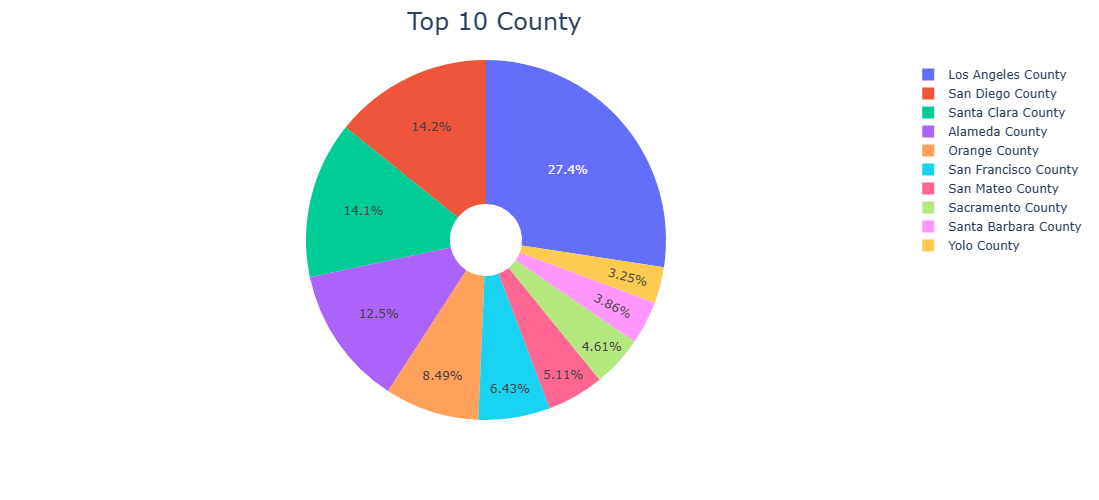

In [42]:
req_counts = df['Location'].value_counts().nlargest(10)
fig = px.pie(df, names=req_counts.index, values=req_counts.values,
              hole=0.2, width=1100, height=500
            )
fig.update_layout(title='Top 10 County', title_x=0.45, title_font=dict(size=24))

fig.show()

In [43]:
# define the world map centered around Canada with a low zoom level
map = folium.Map(location=[38, -120], zoom_start=6)


# instantiate a feature group for the incidents in the dfframe
incidents = folium.map.FeatureGroup()


for Latitude, Longtitude, flag in zip(df.Latitude, df.Longtitude, df['Personal_Loan']):
    if flag==0:    
        incidents.add_child(
            folium.vector_layers.CircleMarker(
                [Latitude, Longtitude],
                radius=1, # define how big you want the circle markers to be
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6
            )
        )
    else:
        incidents.add_child(
            folium.vector_layers.CircleMarker(
                [Latitude, Longtitude],
                radius=5, # define how big you want the circle markers to be
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=1
            )
        )

    
# add incidents to map
map.add_child(incidents)

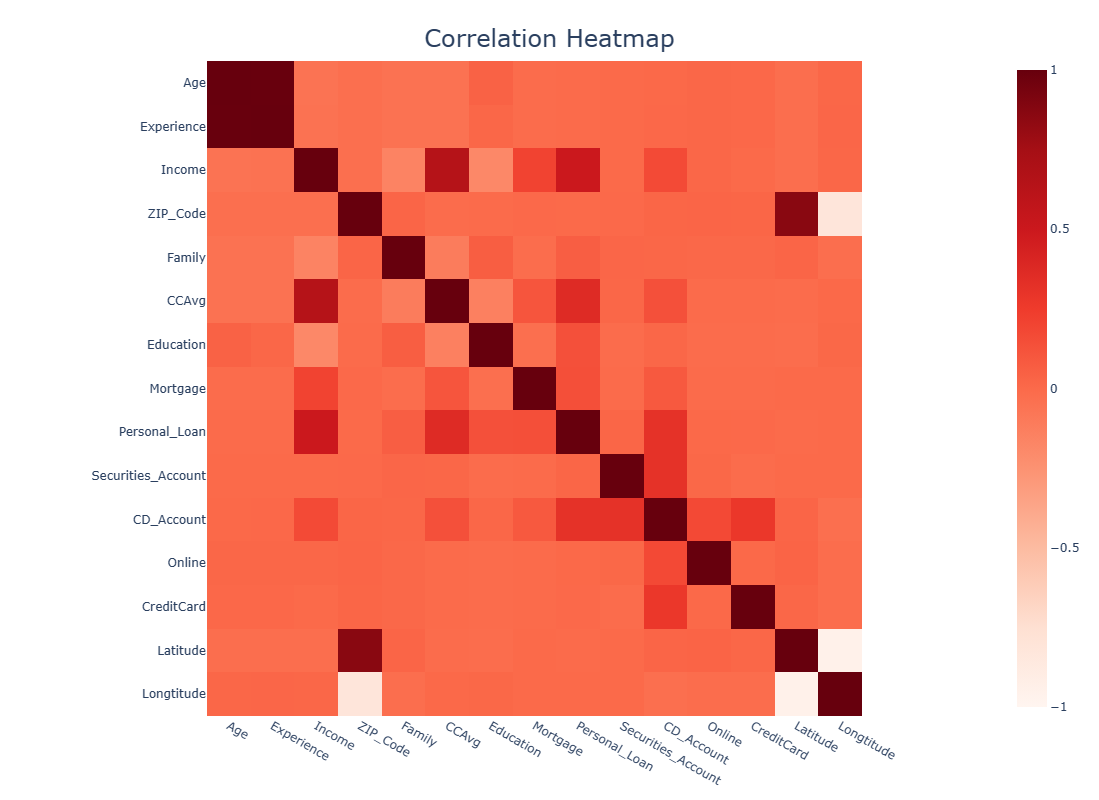

In [44]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]

fig = px.imshow(numeric_df.corr(), color_continuous_scale="Reds",
                color_continuous_midpoint=0)
fig.update_layout(
    title={
        'text': "Correlation Heatmap",
        'font': {'size': 24},
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'  
    },
    width=1000,
    height=800,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    yaxis_autorange='reversed')

fig.show()

<a id="s4"></a>
<h1><p style="padding:15px;background-color:#edf2f4 ;margin:0;color:#191919;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #bc4749">Step 4 | Modeling</p></h1>

<a id="fea"></a>
<h2><b><span style="color:#191919">Step 4.1 | </span><span style="color:#bc4749">Features selection</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍 Preparing features for modeling
</span></h5>

In [45]:
X = df.drop(columns=['Personal_Loan', 'Location', 'Latitude', 'Longtitude', 'ZIP_Code'])
y = df.Personal_Loan.values.reshape(-1, 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 3994 rows and 11 columns.
X_test have 999 rows and 11 columns.


<a id="logreg"></a>
<h2><b><span style="color:#191919">Step 4.2 | </span><span style="color:#bc4749">Logestic Regression

In [48]:
hyperparameters = [{
'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['liblinear','saga', 'newton-cg', 'sag', 'lbfgs'],
    'max_iter' : [100, 1000]
}]
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, hyperparameters, scoring='f1', cv = 3, verbose=True, n_jobs=1)
grid_search.fit(X_train, y_train)
best_logreg_params = grid_search.best_params_

Fitting 3 folds for each of 140 candidates, totalling 420 fits


In [49]:
print(best_logreg_params)

{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [50]:
best_logreg = LogisticRegression(**best_logreg_params)
best_logreg.fit(X_train, y_train)
y_pred_log = best_logreg.predict(X_test)

In [51]:
f1 = metrics.f1_score(y_test, y_pred_log)
mae = metrics.mean_absolute_error(y_test, y_pred_log)
mse = metrics.mean_squared_error(y_test, y_pred_log)
r2 = metrics.r2_score(y_test, y_pred_log)

print("F1 Score:", f1)
print("Mean Absolut Error:", mae)
print("Mean Square Error:", mse)
print("R2Score:", r2)

F1 Score: 0.6710526315789473
Mean Absolut Error: 0.05005005005005005
Mean Square Error: 0.05005005005005005
R2Score: 0.39548337125429633


In [52]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_log))
y_pred_log_train = best_logreg.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_log_train))

Accuracy: 0.94994994994995
Accuracy on train: 0.9521782674011017


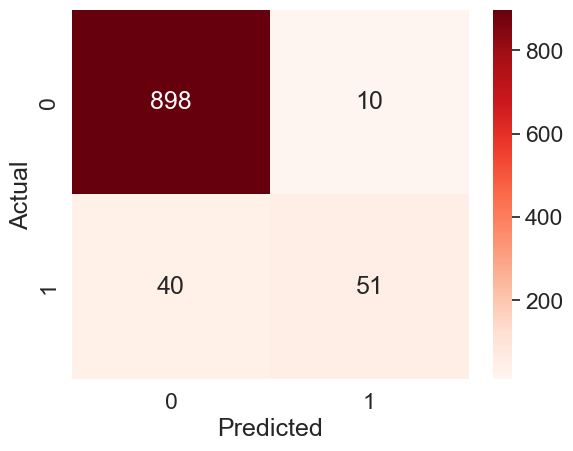

In [53]:
logreg_cm = confusion_matrix(y_test, y_pred_log)
sns.set(font_scale=1.5)
plt.figure(dpi=100)
sns.heatmap(logreg_cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
precision = metrics.precision_score(y_test, y_pred_log)
recall = metrics.recall_score(y_test, y_pred_log)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8360655737704918
Recall: 0.5604395604395604


In [55]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       908
           1       0.84      0.56      0.67        91

    accuracy                           0.95       999
   macro avg       0.90      0.77      0.82       999
weighted avg       0.95      0.95      0.95       999



<a id="knn"></a>
<h2><b><span style="color:#191919">Step 4.3 | </span><span style="color:#bc4749">KNN</span></b></h2>

In [56]:
train_accuaracy = []
test_accuaracy = []
neighbors_set = range(1,30)
for n_neighbor in neighbors_set:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn_model.fit(X_train,y_train.ravel())
    train_accuaracy.append(knn_model.score(X_train,y_train))
    test_accuaracy.append(knn_model.score(X_test,y_test))

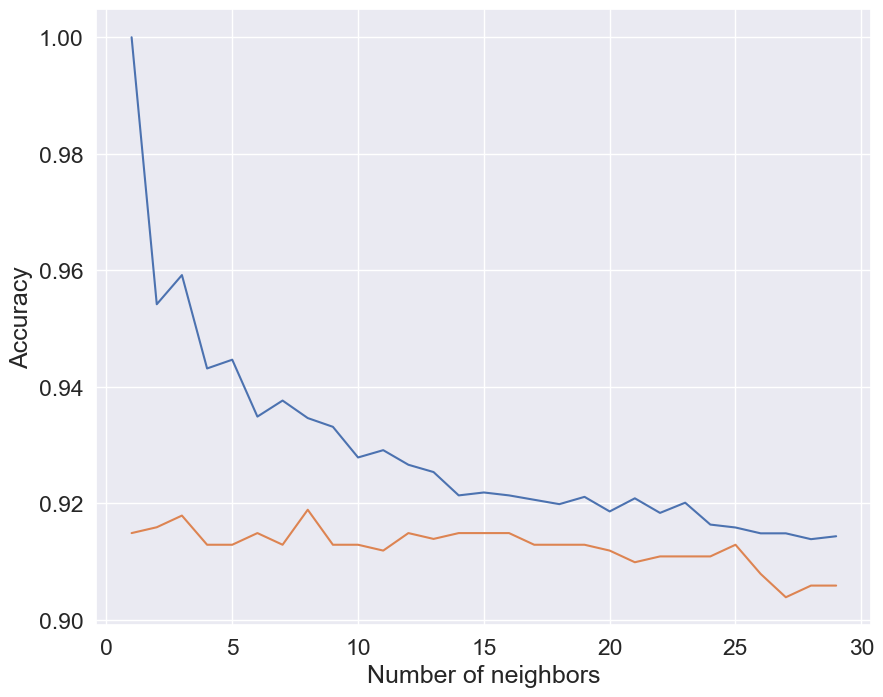

In [57]:
plt.figure(figsize=(10,8))
plt.plot(neighbors_set,train_accuaracy)
plt.plot(neighbors_set,test_accuaracy)
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.grid()
plt.grid()

In [58]:
hyperparameters = [{
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, scoring='f1', cv=3, verbose=True, n_jobs=1)
grid_search.fit(X_train, y_train)
best_knn_params = grid_search.best_params_;

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [59]:
print(best_knn_params)

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [60]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train, y_train.ravel())
y_pred_knn = best_knn.predict(X_test)

In [61]:
f1 = metrics.f1_score(y_test, y_pred_knn)
mae = metrics.mean_absolute_error(y_test, y_pred_knn)
mse = metrics.mean_squared_error(y_test, y_pred_knn)
r2 = metrics.r2_score(y_test, y_pred_knn)

print("F1 Score:", f1)
print("Mean Absolut Error:", mae)
print("Mean Square Error:", mse)
print("R2Score:", r2)


F1 Score: 0.5
Mean Absolut Error: 0.07607607607607608
Mean Square Error: 0.07607607607607608
R2Score: 0.08113472430653035


In [62]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_knn))
y_pred_knn_train = best_knn.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_knn_train))

Accuracy: 0.923923923923924
Accuracy on train: 1.0


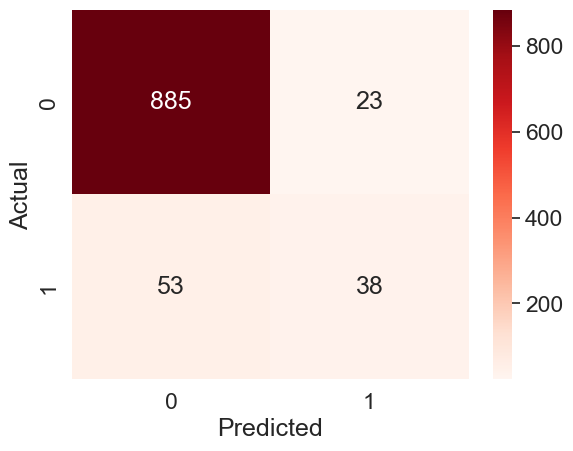

In [63]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
sns.set(font_scale=1.5)
plt.figure(dpi=100)
sns.heatmap(knn_cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a id="cnb"></a>
<h2><b><span style="color:#191919">Step 4.4 | </span><span style="color:#bc4749">Complement Naive Bayes (CNB)</span></b></h2>

In [64]:
hyperparameters = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}
cnb = ComplementNB()
grid_search = GridSearchCV(cnb, hyperparameters, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [65]:
print(best_params)

{'alpha': 0.1, 'fit_prior': True}


In [66]:
best_cnb = ComplementNB(alpha=0.1, fit_prior=True)
best_cnb.fit(X_train, y_train)
y_pred_cnb = best_cnb.predict(X_test)

In [67]:
f1 = metrics.f1_score(y_test, y_pred_cnb)
mae = metrics.mean_absolute_error(y_test, y_pred_cnb)
mse = metrics.mean_squared_error(y_test, y_pred_cnb)
r2 = metrics.r2_score(y_test, y_pred_cnb)

print("F1 Score:", f1)
print("Mean Absolut Error:", mae)
print("Mean Square Error:", mse)
print("R2Score:", r2)

F1 Score: 0.3403141361256545
Mean Absolut Error: 0.25225225225225223
Mean Square Error: 0.25225225225225223
R2Score: -2.046763808878347


In [68]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_cnb))
y_pred_cnb_train = best_cnb.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_cnb_train))

Accuracy: 0.7477477477477478
Accuracy on train: 0.7463695543314972


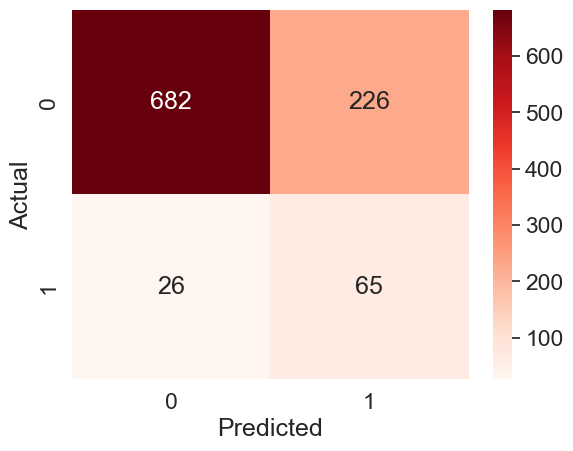

In [69]:
cnb_cm = confusion_matrix(y_test, y_pred_cnb)
sns.set(font_scale=1.5)
plt.figure(dpi=100)
sns.heatmap(cnb_cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
precision = metrics.precision_score(y_test, y_pred_cnb)
recall = metrics.recall_score(y_test, y_pred_cnb)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.22336769759450173
Recall: 0.7142857142857143


In [71]:
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       908
           1       0.22      0.71      0.34        91

    accuracy                           0.75       999
   macro avg       0.59      0.73      0.59       999
weighted avg       0.90      0.75      0.80       999



<a id="dtc"></a>
<h2><b><span style="color:#191919">Step 4.5 | </span><span style="color:#bc4749">Decision Tree classifier</span></b></h2>

In [72]:
hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=1)
grid_search.fit(X_train, y_train)
best_dt_params = grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [73]:
print(best_dt_params)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [74]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, y_train.ravel())
y_pred_dt = best_dt.predict(X_test)

In [75]:
f1 = metrics.f1_score(y_test, y_pred_dt)
mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
r2 = metrics.r2_score(y_test, y_pred_dt)

print("F1 Score:", f1)
print("Mean Absolut Error:", mae)
print("Mean Square Error:", mse)
print("R2Score:", r2)

F1 Score: 0.8606060606060606
Mean Absolut Error: 0.023023023023023025
Mean Square Error: 0.023023023023023025
R2Score: 0.7219223507769763


In [76]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_dt))
y_pred_dt_train = best_dt.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_dt_train))

Accuracy: 0.9769769769769769
Accuracy on train: 0.9892338507761642


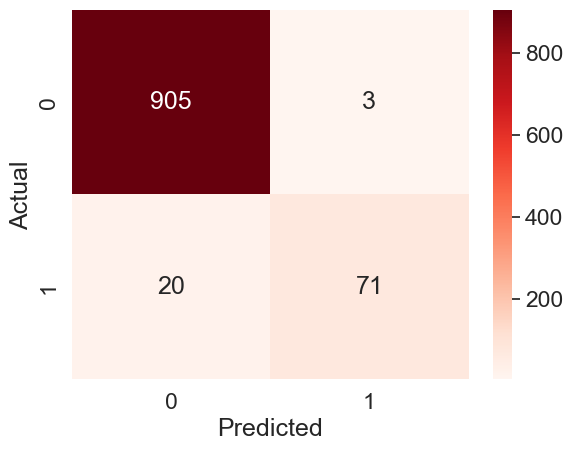

In [77]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.set(font_scale=1.5)
plt.figure(dpi=100)
sns.heatmap(dt_cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a id="rf"></a>
<h2><b><span style="color:#191919">Step 4.6 | </span><span style="color:#bc4749">Random Forest classifier</span></b></h2>

In [78]:
hyperparameters = [{
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20],
    'max_features':[2,3,4,5]
}]

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 10, 20],
                          'max_features': [2, 3, 4, 5],
                          'n_estimators': [100, 200, 300]}],
             scoring='f1', verbose=True)

In [79]:
best_rf_params = grid_search.best_params_
print(best_rf_params)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 100}


In [80]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train.ravel())
y_pred_rf = best_rf.predict(X_test)

In [81]:
f1 = metrics.f1_score(y_test, y_pred_rf)
mae = metrics.mean_absolute_error(y_test, y_pred_rf)
mse = metrics.mean_squared_error(y_test, y_pred_rf)
r2 = metrics.r2_score(y_test, y_pred_rf)

print("F1 Score:", f1)
print("Mean Absolut Error:", mae)
print("Mean Square Error:", mse)
print("R2Score:", r2)

F1 Score: 0.9302325581395348
Mean Absolut Error: 0.012012012012012012
Mean Square Error: 0.012012012012012012
R2Score: 0.854916009101031


In [82]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_rf))
y_pred_rf_train = best_rf.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_rf_train))

Accuracy: 0.987987987987988
Accuracy on train: 1.0


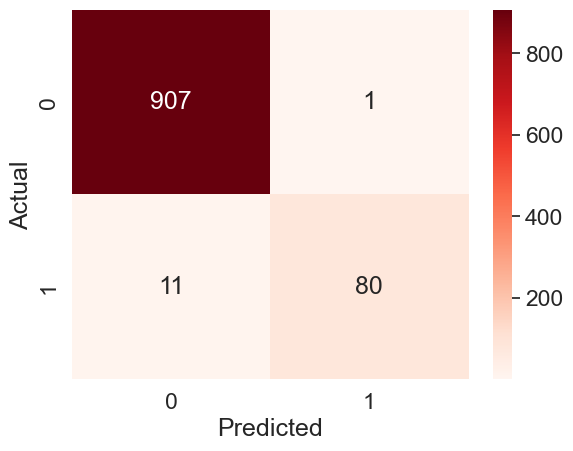

In [83]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.set(font_scale=1.5)
plt.figure(dpi=100)
sns.heatmap(rf_cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a id="re"></a>
<h2><b><span style="color:#191919">Step 4.7 | </span><span style="color:#bc4749">Result</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #edf2f4; font-size:100%; text-align:left">
<h3><span style="align:left; color:black; font-weight:102; font-size:100%">
    📍 After conducting an analysis of different machine learning algorithms and assessing their scores and error rates, it has been concluded that the Random Forest classifier is the optimal algorithm for the "Bank_Personal_Loan" dataset.
</span></h3>

<a id="author"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #edf2f4; font-size:130%; text-align:left">

<h4 align="left"><span style="font-weight:700; font-size:130%"><font color=#bc4749>Author:</font><font color=#191919> Mohammadaref Ahmadpoor</font></span></h4>
<h6 align="left"><font color=#191919><a href='https://github.com/ahmadpoor79'>github: https://github.com/ahmadpoor79</font></h6>
<h6 align="left"><font color=#191919><a href='https://www.kaggle.com/ahmadpour79'>kaggle : https://www.kaggle.com/ahmadpour79</a></font></h6>
<h6 align="left"><font color=#191919><a href='https://www.linkedin.com/in/mohammadaref-ahmadpoor-8b789b230/'>linkedin : www.linkedin.com/in/mohammadaref-ahmadpoor-8b789b230/</a></font></h6>